In [1]:
# Poisson distribution

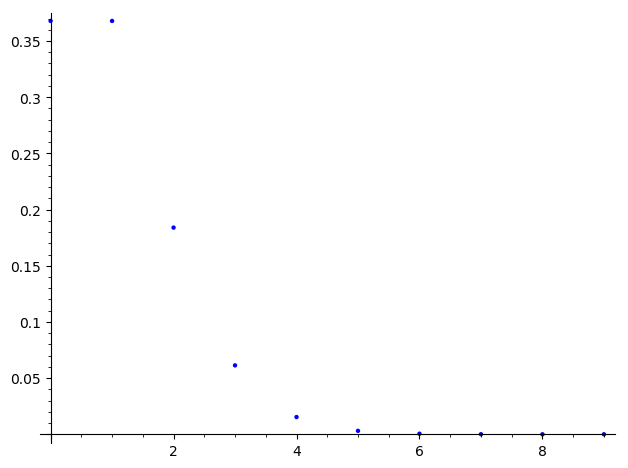

In [2]:
# from last time
# plot the pmf of Poisson distribution

lam = 1 # intensity
pmf_list = [lam^k * exp(-lam)/factorial(k) for k in range(0,10)]
list_plot(pmf_list) 

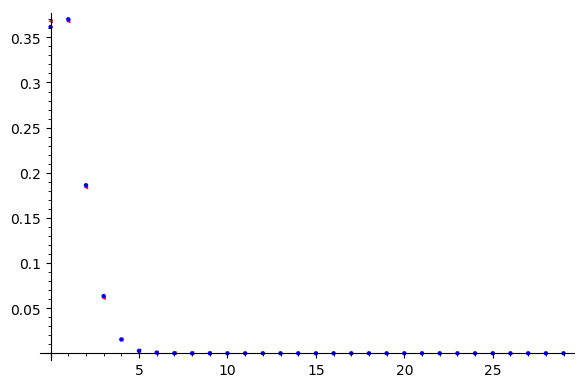

In [24]:
# plot pmf and experimental dist on same list_plot
import matplotlib.pyplot as plt
import numpy as np
intens = 1 # expected number of hits in one unit of time 
num_trials = 10000 
time_steps = 50 # divide our unit of time into this many
#pieces.  Will get large. In each piece prob of getting a hit 
# is intens/time_steps
# Poisson is limit as time_steps -> infinity

hits_type = np.zeros(num_trials) # ith element will be the number of trials that 
# got i hits (divided by num_trials to give a frequency)
for trial in range(num_trials):
    num_hits = 0
    for t in range(time_steps):
        # in this step, prob of getting hit is intens/time_steps
        hit = 0 # will be 0 if not hit, if 1 hit
        rand = random()
        if rand < intens/time_steps:
            hit = 1
        else:
            hit = 0
        num_hits += hit
    hits_type[num_hits] +=1/num_trials

lam = 1 # intensity
# plot the pmf of Poisson distribution
pmf_list = [lam^k * exp(-lam)/factorial(k) for k in range(0,10)]
list_plot(pmf_list[0:30], color="red",marker="<")\
+ list_plot(hits_type[0:30])
# theoretical pmf plotted in red
# experimental results in blue
# they will be very close

In [25]:
# how to sample from an actual poisson dist?
# (above experiment samples from a good approx)
import numpy as np
np.random.poisson()  # default is intensity 1

2

(array([37.,  0., 38.,  0.,  0., 22.,  0.,  2.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

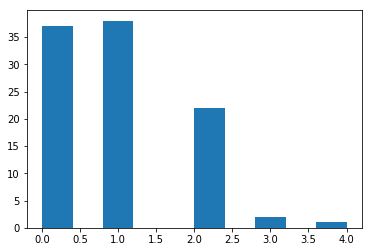

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist([np.random.poisson() for n in range(100)])
# gives good approximation to pmf

(array([348., 360.,   0., 207.,   0.,  72.,  12.,   0.,   0.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

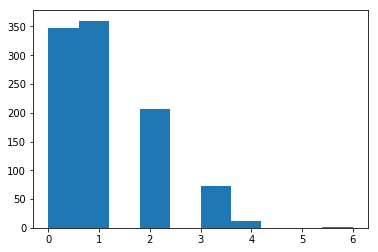

In [27]:
# suppose we just know pmf: lam^k * exp(-lam)/factorial(k)
# how could we produce a sample from poisson? 
# (without builtin random.poisson() function)
# using uniform (0,1) random

lam = 1
results =[]
for n in range(1000):
    still_going = True
    k=0
    adjust = 0.0
    while still_going:
        rand = random()
        if (rand < (lam^k * exp(-lam)/factorial(k))/(1-adjust)):
            # above happens with probabily equal to 
            # prob that variable equals k, given that it is at least k
            still_going=False
        else:
            adjust += N(lam^k * exp(-lam)/factorial(k)) 
            # above keeps track of prob that rand var is at most k 
            k += 1
            # print(adjust)
    results.append(k) # the value of k is one sample from Poisson dist
plt.hist(results)

In [29]:
# one sample from a standard normal distribution
import numpy as np
np.random.normal()

-0.8227108813311762

(array([4.000e+00, 2.000e+00, 2.000e+00, 7.000e+00, 2.100e+01, 3.400e+01,
        4.000e+01, 7.900e+01, 1.490e+02, 2.220e+02, 3.790e+02, 4.880e+02,
        7.370e+02, 1.030e+03, 1.427e+03, 1.909e+03, 2.553e+03, 3.167e+03,
        3.729e+03, 4.347e+03, 5.100e+03, 5.582e+03, 6.169e+03, 6.666e+03,
        6.611e+03, 6.632e+03, 6.547e+03, 6.284e+03, 5.578e+03, 4.923e+03,
        4.329e+03, 3.640e+03, 3.025e+03, 2.331e+03, 1.777e+03, 1.427e+03,
        1.008e+03, 6.980e+02, 4.700e+02, 2.960e+02, 2.290e+02, 1.490e+02,
        8.300e+01, 5.300e+01, 3.300e+01, 1.700e+01, 9.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00]),
 array([-4.20315424, -4.03435916, -3.86556408, -3.696769  , -3.52797392,
        -3.35917884, -3.19038376, -3.02158869, -2.85279361, -2.68399853,
        -2.51520345, -2.34640837, -2.17761329, -2.00881821, -1.84002313,
        -1.67122805, -1.50243298, -1.3336379 , -1.16484282, -0.99604774,
        -0.82725266, -0.65845758, -0.4896625 , -0.32086742, -0.15207235,


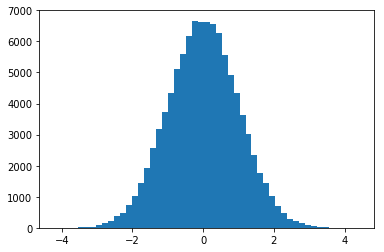

In [7]:
# many sample from normal distribution
import numpy as np
import matplotlib.pyplot as plt
plt.hist([np.random.normal() for n in range(100000)], bins=51)

In [8]:
# empirically compute variance for Poisson X_lam
# Recall that E(X_lam) = lam
# Want to estimate: E((X_lam-E(X_lam))^2)
# = E((X_lam - lam)^2)
lam = 1
num_trials = 500000
N(sum([(np.random.poisson(lam) - lam)^2 \
     for n in range(num_trials)]) / num_trials)
# variance approx 1

1.00011000000000

In [9]:
# empirically compute variance for Poisson X_lam
# Recall that E(X_lam) = lam
# Want to estimate: E((X_lam-E(X_lam))^2)
# = E((X_lam - lam)^2)
lam = 3
num_trials = 500000
N(sum([(np.random.poisson(lam) - lam)^2 \
     for n in range(num_trials)]) / num_trials)
# variance approx 

3.00315600000000

In [10]:
# Lesson: variance of Poisson X_lam is equal to lam
# (special property of Poisson)

In [11]:
# empirically compute variance for standard normal
# Recall that E(X) = 0
# Want to estimate: E((X-E(X))^2)
# = E(X^2)
num_trials = 500000
N(sum([np.random.normal()^2 \
     for n in range(num_trials)]) / num_trials)
# variance approx 1

0.999320461850193

In [12]:
# standard normal has mean 0, variance 1

<h3> New Topic: Graphs </h3>

In [13]:
# package for graphs
import networkx as nx
G = nx.Graph() # create a new empty graph

In [14]:
G.add_node(0) # add node

In [15]:
G.add_node(1)

In [16]:
G.add_edge(0,1) # add edge connecting node 0 to node 1

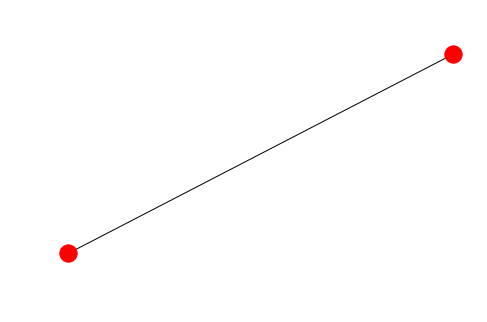

In [17]:
nx.draw(G)

In [18]:
H = nx.Graph()

In [19]:
H.add_nodes_from([0,1,2]) # can make graph from list of vertices

In [20]:
H.add_edges_from([(0,1), (1,2)]) # specify list of edges

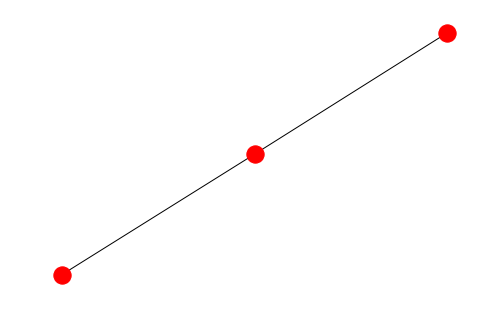

In [21]:
nx.draw(H)